# Task 4 Hapiness Score Prediction

### Objetivos
En este proyecto nuestro objetivos son:
1. Predecir el score de la felicidad de un pais y basarlo en un ranking.
2. Descubrir que caracteristicas son las que contribuyen para aumentar la felicidad de un pais.

El proyecto se divide en dos partes
*EDA
*Creacion de modelos
*Predicciones de hapiness score



## EDA Exploratory data analysis
### Prepare and Explore the Data

Se importa el dataset con algunos cambios del original como son, creacion de un solo dataset para los años 2015-2017, eliminacion de columnas que no se presentan en todos los datasets, creacion de nueva variable year.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from math import sqrt
%matplotlib inline

#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.svm import SVR

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


#cross validation
from sklearn.model_selection import train_test_split

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
#importacion del dataset
Hapiness = pd.read_csv('2015-2018.csv', header =0)
pd.set_option('display.max_columns', None)
Hapiness.head()
Hapiness.dropna()

,Country,Region,Year,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Trust Government Corruption,Generosity,Dystopia Residual
0,Norway,Western Europe,2017,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,Western Europe,2017,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,Western Europe,2017,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,Western Europe,2017,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,Western Europe,2017,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...
307,Benin,Sub-Saharan Africa,2016,3.484,0.394990,0.104190,0.210280,0.397470,0.066810,0.201800,2.108120
308,Afghanistan,Southern Asia,2016,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580
309,Togo,Sub-Saharan Africa,2016,3.303,0.281230,0.000000,0.248110,0.346780,0.115870,0.175170,2.135400
310,Syria,Middle East and Northern Africa,2016,3.069,0.747190,0.148660,0.629940,0.069120,0.172330,0.483970,0.817890


In [3]:
#Resumen del dataset
Hapiness.describe()   


,Year,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Trust Government Corruption,Generosity,Dystopia Residual
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,312.000000
mean,2015.993617,5.370728,0.659481,0.941633,0.701254,0.470615,0.271479,0.169868,2.089546
std,0.816907,1.136998,0.552131,0.368467,0.321575,0.219175,0.179398,0.129992,0.572716
min,2015.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,2015.000000,4.509000,0.050765,0.714645,0.501293,0.317865,0.116105,0.071012,1.723910
50%,2016.000000,5.282500,0.653987,0.991073,0.689172,0.455071,0.243450,0.134206,2.094640
75%,2017.000000,6.233750,1.152730,1.218020,0.903294,0.602005,0.408350,0.242468,2.452944
max,2017.000000,7.587000,1.870766,1.690420,1.402230,1.025250,0.838075,0.819710,3.837720


In [4]:
#Revisar data types
Hapiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 11 columns):
Country                        470 non-null object
Region                         469 non-null object
Year                           470 non-null int64
Happiness Score                470 non-null float64
GDP per Capita                 470 non-null float64
Family                         470 non-null float64
Life Expectancy                470 non-null float64
Freedom                        470 non-null float64
Trust Government Corruption    470 non-null float64
Generosity                     470 non-null float64
Dystopia Residual              312 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 40.5+ KB


#### *Data Cleaning and Data transformation*


In [5]:
#dependent variable
depVar = Hapiness['Happiness Score']
print(depVar)

0      7.537
1      7.522
2      7.504
3      7.494
4      7.469
       ...  
465    3.465
466    3.340
467    3.006
468    2.905
469    2.839
Name: Happiness Score, Length: 470, dtype: float64


In [6]:
#Se cambian a categorias las columnas Paises y Regiones
Hapiness['Country'] = Hapiness['Country'].astype('category')
Hapiness['Region'] = Hapiness['Region'].astype('category')
Hapiness['Year'] = Hapiness['Year'].astype('category')
Hapiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 11 columns):
Country                        470 non-null category
Region                         469 non-null category
Year                           470 non-null category
Happiness Score                470 non-null float64
GDP per Capita                 470 non-null float64
Family                         470 non-null float64
Life Expectancy                470 non-null float64
Freedom                        470 non-null float64
Trust Government Corruption    470 non-null float64
Generosity                     470 non-null float64
Dystopia Residual              312 non-null float64
dtypes: category(3), float64(8)
memory usage: 38.1 KB


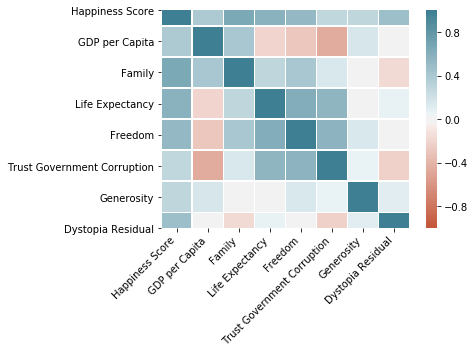

In [7]:
#Se observan las caracteristicas que mas estan relacionadas 
#con la variable dependiente.
corr = Hapiness.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

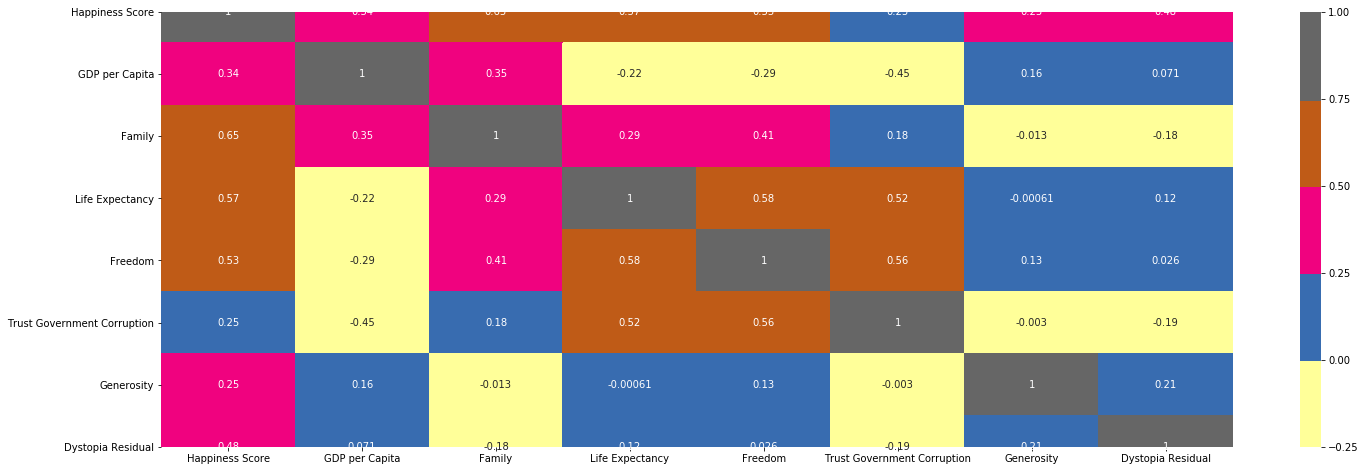

In [8]:
cormatrix= Hapiness.corr(method='spearman')
cormatrix
fig, ax = plt.subplots(figsize=(24, 8))
sns.heatmap(cormatrix, vmin=-.25, vmax=1, ax=ax, center=0, cmap="Accent", annot=True)

En referencia al grafico, se muestra que las variables _Family, Life_ _Expectancy_ y _Libertad_ son las mas relacionadas a nuestra variable dependiente _Hapiness Score, seguida de GDP_ y _Generosity_. Si queremos verlo en orden decendenente de mayor a menor correlació seria el siguiente:

1. Family
2. Freedom
3. Life Expectancy
4. GDP per capita
5. Generosity
6. Trust Goverment

In [9]:
#Index de la tabla
header = Hapiness.dtypes.index
print(header)

Index(['Country', 'Region', 'Year', 'Happiness Score', 'GDP per Capita',
       'Family', 'Life Expectancy', 'Freedom', 'Trust Government Corruption',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


In [10]:

#Se crea tabla del ranking de paises del 2015
Y2015 = Hapiness[Hapiness['Year']==2015]
Y2015.head()

,Country,Region,Year,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Trust Government Corruption,Generosity,Dystopia Residual
312,Switzerland,Western Europe,2015,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,NaN
313,Iceland,Western Europe,2015,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,NaN
314,Denmark,Western Europe,2015,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,NaN
315,Norway,Western Europe,2015,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,NaN
316,Canada,North America,2015,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,NaN


In [11]:
#Se crea tabla del ranking de paises del 2016
Y2016 = Hapiness[Hapiness['Year']==2016]
Y2016.head()

,Country,Region,Year,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Trust Government Corruption,Generosity,Dystopia Residual
155,Denmark,Western Europe,2016,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
156,Switzerland,Western Europe,2016,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
157,Iceland,Western Europe,2016,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
158,Norway,Western Europe,2016,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
159,Finland,Western Europe,2016,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [12]:
#Se crea tabla del ranking de paises del 2017
Y2017 = Hapiness[Hapiness['Year']==2017]
Y2017.head()

,Country,Region,Year,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Trust Government Corruption,Generosity,Dystopia Residual
0,Norway,Western Europe,2017,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,Western Europe,2017,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,Western Europe,2017,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,Western Europe,2017,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,Western Europe,2017,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


### Vizualizaciones

(array([ 54., 149., 161., 106.]),
 array([2.69300008, 3.91650006, 5.14000004, 6.36350002, 7.587     ]),
 <a list of 4 Patch objects>)

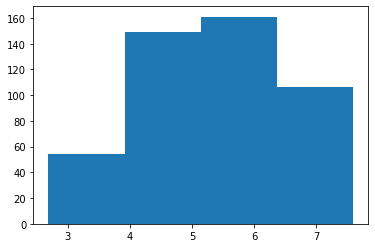

In [13]:
#Age
plt.hist(Hapiness['Happiness Score'], bins=4)

[Text(0, 0.5, 'Region'),
 Text(0.5, 0, 'Percentage'),
 Text(0.5, 1.0, 'Percentage of properties According to States ')]

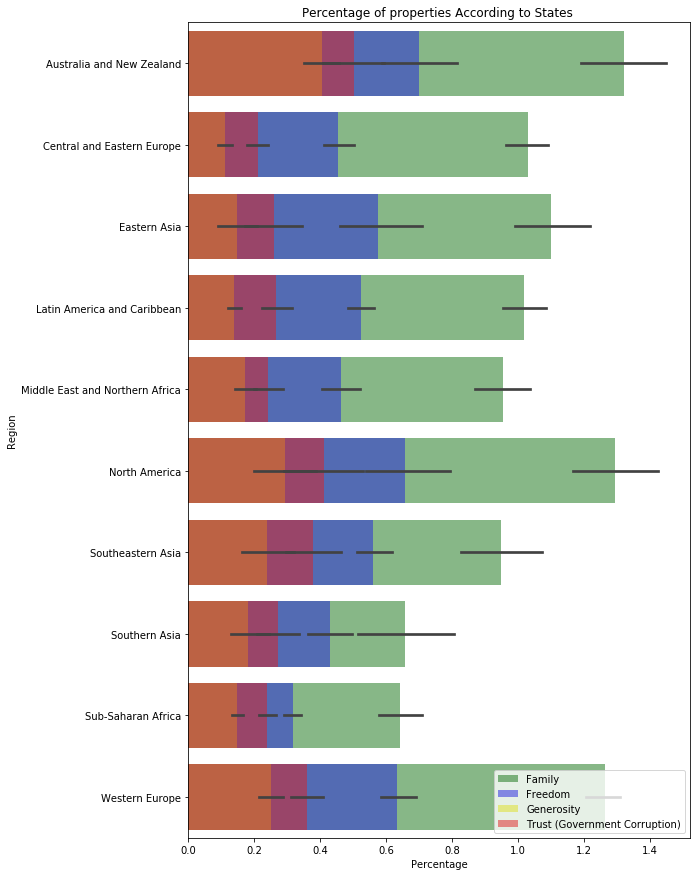

In [79]:
# happiness score en basado en las regiones
region_list = Hapiness['Region'].unique()

f,ax = plt.subplots(figsize=(9,15))

sns.barplot(x='Family', y='Region', data = Hapiness,color = 'green' , alpha = 0.5 , label = 'Family')
sns.barplot(x='Freedom', y='Region', data = Hapiness,color = 'blue' , alpha = 0.5 , label = 'Freedom')
sns.barplot(x='Generosity', y='Region', data = Hapiness,color = 'yellow' , alpha = 0.5 , label = 'Generosity')
sns.barplot(x='Trust Government Corruption', y='Region', data = Hapiness,color = 'red' , alpha = 0.5 , label = 'Trust (Government Corruption)')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu framen gorunurlugu bölme 
ax.set(xlabel='Percentage', ylabel='Region',title = "Percentage of properties According to States ")

In [107]:

Country_list = Hapiness.sort_values('Happiness Score',ascending=False)
Country_list

,Country,Region,Year,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Trust Government Corruption,Generosity,Dystopia Residual
312,Switzerland,Western Europe,2015,7.587,0.034110,1.396510,1.349510,0.941430,0.665570,0.419780,NaN
313,Iceland,Western Europe,2015,7.561,0.048840,1.302320,1.402230,0.947840,0.628770,0.141450,NaN
0,Norway,Western Europe,2017,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
314,Denmark,Western Europe,2015,7.527,0.033280,1.325480,1.360580,0.874640,0.649380,0.483570,NaN
155,Denmark,Western Europe,2016,7.526,1.441780,1.163740,0.795040,0.579410,0.444530,0.361710,2.739390
...,...,...,...,...,...,...,...,...,...,...,...
468,Burundi,Sub-Saharan Africa,2015,2.905,0.086580,0.015300,0.415870,0.223960,0.118500,0.100620,NaN
311,Burundi,Sub-Saharan Africa,2016,2.905,0.068310,0.234420,0.157470,0.043200,0.094190,0.202900,2.104040
153,Burundi,Sub-Saharan Africa,2017,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
469,Togo,Sub-Saharan Africa,2015,2.839,0.067270,0.208680,0.139950,0.284430,0.364530,0.107310,NaN


[Text(0, 0.5, 'Country'),
 Text(0.5, 0, 'Percentage'),
 Text(0.5, 1.0, 'Percentage of properties According to States ')]

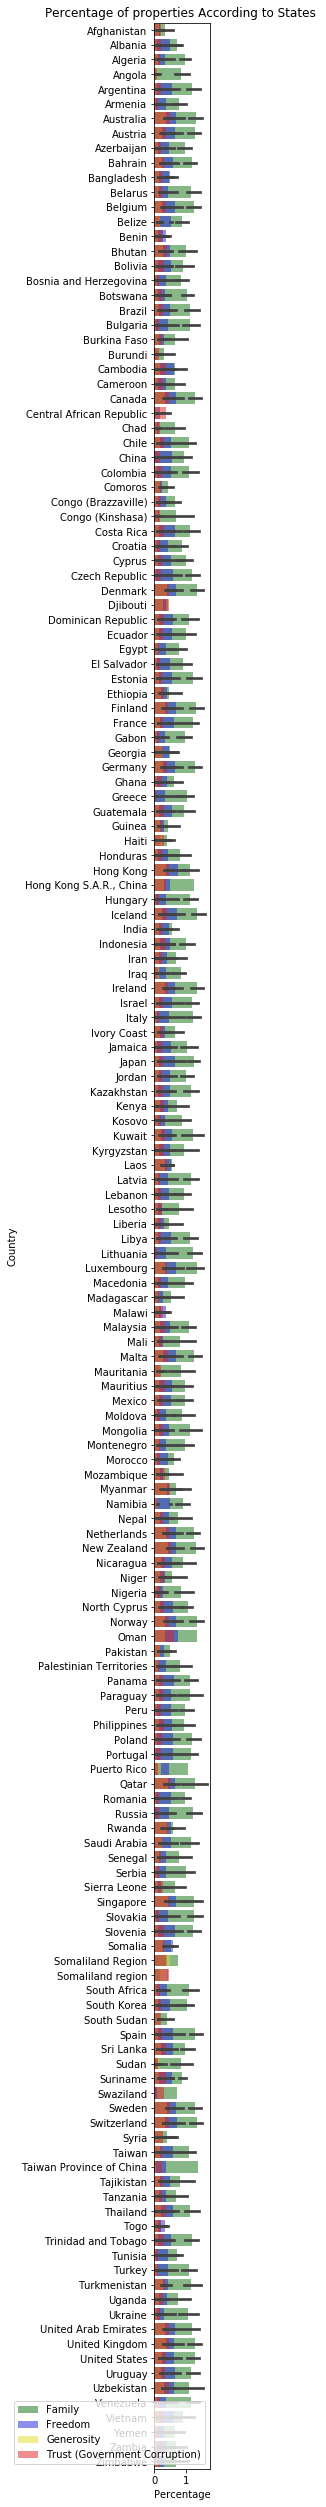

In [93]:

# happiness score en basado en las regiones


f,ax = plt.subplots(figsize=(1,45))

sns.barplot(x='Family', y='Country', data = Country_list,color = 'green' , alpha = 0.5 , label = 'Family')
sns.barplot(x='Freedom', y='Country', data = Country_list,color = 'blue' , alpha = 0.5 , label = 'Freedom')
sns.barplot(x='Generosity', y='Country', data = Country_list,color = 'yellow' , alpha = 0.5 , label = 'Generosity')
sns.barplot(x='Trust Government Corruption', y='Country', data = Country_list,color = 'red' , alpha = 0.5 , label = 'Trust (Government Corruption)')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu framen gorunurlugu bölme 
ax.set(xlabel='Percentage', ylabel='Country',title = "Percentage of properties According to States ")


In [95]:
#Indices de Costa rica

CR=Country_list[Country_list['Country']=='Costa Rica']
CR.head()

,Country,Region,Year,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Trust Government Corruption,Generosity,Dystopia Residual
323,Costa Rica,Latin America and Caribbean,2015,7.226,0.044540,0.955780,1.237880,0.860270,0.633760,0.105830,NaN
168,Costa Rica,Latin America and Caribbean,2016,7.087,1.068790,1.021520,0.761460,0.552250,0.105470,0.225530,3.351680
11,Costa Rica,Latin America and Caribbean,2017,7.079,1.109706,1.416404,0.759509,0.580132,0.214613,0.100107,2.898639


Text(0.5, 1.0, 'Distribucion de las Happiness Score de CR')

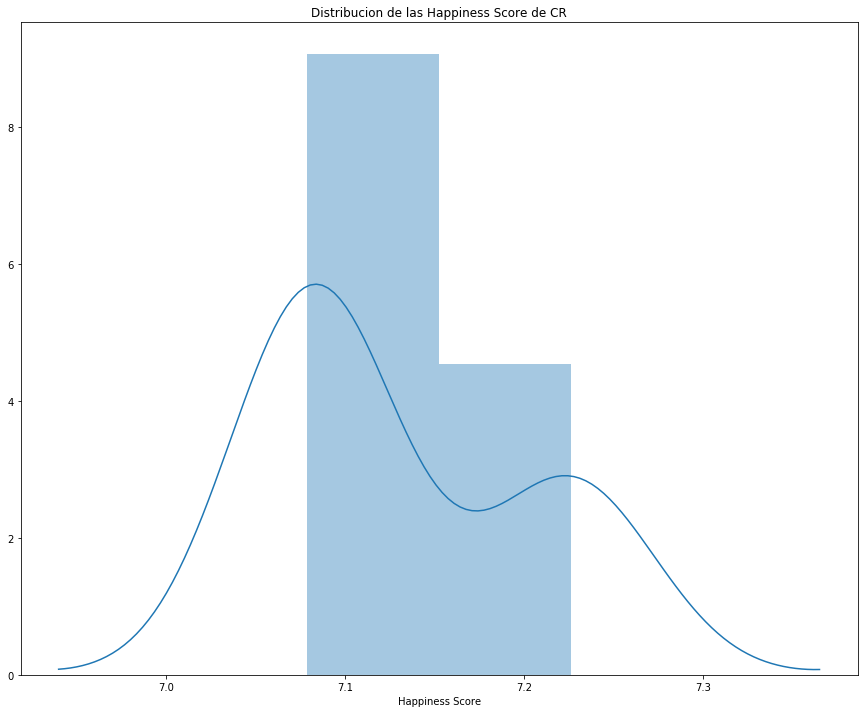

In [106]:
# happiness score en basado en Costa Rica

CRScore = CR['Happiness Score'].dropna()


age_dist = sns.distplot(CRScore)
age_dist.set_title("Distribucion de las Happiness Score de CR")

# Preparando la data para el modelo
### Seleccion de caracteristicas

In [15]:
features = Hapiness.iloc[:,4:10]
print('Summary of feature sample')
features.head()

Summary of feature sample


,GDP per Capita,Family,Life Expectancy,Freedom,Trust Government Corruption,Generosity
0,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


In [16]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 6 columns):
GDP per Capita                 470 non-null float64
Family                         470 non-null float64
Life Expectancy                470 non-null float64
Freedom                        470 non-null float64
Trust Government Corruption    470 non-null float64
Generosity                     470 non-null float64
dtypes: float64(6)
memory usage: 22.2 KB


In [17]:
#Training Set (Feature Space: X Training)
X_train = (features[: 329])
X_train.head()

,GDP per Capita,Family,Life Expectancy,Freedom,Trust Government Corruption,Generosity
0,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


In [18]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 329]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 329


0    7.537
1    7.522
2    7.504
3    7.494
4    7.469
Name: Happiness Score, dtype: float64

In [19]:
#Testing Set (X Testing)
X_test = features[-141:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 141
     GDP per Capita   Family  Life Expectancy  Freedom  \
329         0.03676  1.33596          1.36948  0.89533   
330         0.03595  1.30782          1.28566  0.89667   
331         0.03729  1.42727          1.12575  0.80925   
332         0.01866  1.26637          1.28548  0.90943   
333         0.05335  1.36011          1.08182  0.76276   

     Trust Government Corruption  Generosity  
329                      0.61777     0.28703  
330                      0.58450     0.22540  
331                      0.64157     0.38583  
332                      0.59625     0.32067  
333                      0.63274     0.32524  


In [20]:
#Ground Truth (y_test) 
y_test = depVar[-141:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 141


329    6.940
330    6.937
331    6.901
332    6.867
333    6.853
Name: Happiness Score, dtype: float64

### Cross validation

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((246, 6), (83, 6))

### Model Definition

In [22]:
#Models
models = [
    ('Ramdom Forest', RandomForestRegressor()),
    ('SVR', SVR()),
    ('Linear Regression', LinearRegression()) ]

print('Happiness Dataset on Regresion model')

for name, model in models:
        clf = model
        clf.fit(X_train, y_train)
        accuracT = clf.score(X_train, y_train)
        print( name, '- Accurracy ',accuracT )


Happiness Dataset on Regresion model
Ramdom Forest - Accurracy  0.9615012264549014
SVR - Accurracy  0.7954438007845938
Linear Regression - Accurracy  0.7901697688733194


### Tuning y Scores del Modelo

In [23]:
#Se crea la variable con el metodo con mas accuracy
# Y se realiza tunning para mejorar el resultado
HRF2=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
HRF2.fit(X_train, y_train)

print('El resuldado del modelo Random forest:')
print('R-Squared:', HRF2.score(X_train, y_train))
print('Training score:', cross_val_score(HRF2, X_train, y_train)) 

El resuldado del modelo Random forest:
R-Squared: 0.9632500349321256
Training score: [0.81292258 0.8010907  0.77692968]


# Predicciones en Y Test

In [32]:
#Make Predictions
predictions = HRF2.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))

print('Predicciones para Hapiness Score Y Test')
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)


Predicciones para Hapiness Score Y Test
R Squared: 0.798
RMSE: 0.515


In [127]:
y_test

68     5.500
173    6.907
156    7.509
293    3.916
229    5.458
       ...  
14     6.977
145    3.593
236    5.279
235    5.291
189    6.379
Name: Happiness Score, Length: 83, dtype: float64

In [128]:
X_test

,GDP per Capita,Family,Life Expectancy,Freedom,Trust Government Corruption,Generosity
68,1.198274,1.337753,0.637606,0.300741,0.046693,0.099672
173,1.483410,1.161570,0.814550,0.540080,0.297540,0.449630
156,1.527330,1.145240,0.863030,0.585570,0.412030,0.280830
293,0.555070,0.575760,0.044760,0.406630,0.155300,0.203380
229,1.510700,0.870210,0.952770,0.480790,0.316470,0.400970
...,...,...,...,...,...,...
14,1.535707,1.558231,0.809783,0.573110,0.427858,0.298388
145,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767
236,0.812170,0.878770,0.470360,0.548540,0.117570,0.216740
235,1.123730,0.760420,0.545040,0.353270,0.179140,0.056400


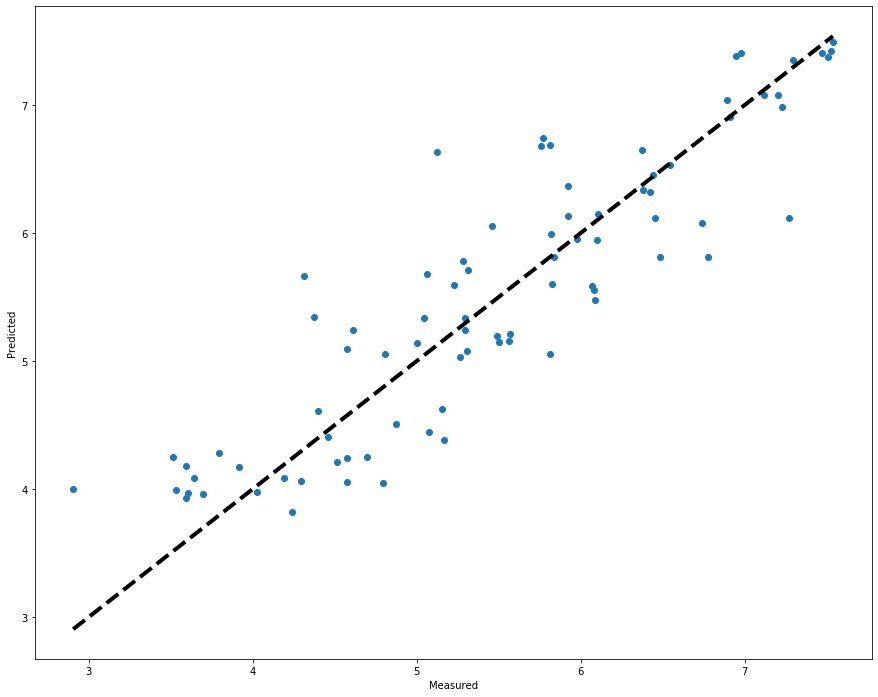

In [142]:
#Vizualizacion de los errores en las predicciones

y = y_test
fig, ax = plt.subplots()
ax.scatter(y, predictions)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [147]:
#Se guarda el modelo para la prediccion del 2019
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib
joblib.dump(HRF2, "HRF2.sav")

['HRF2.sav']

# Predicciones en el dataset 2019

Se usara el modelo creado para predecir el hapiness score el dataset del ano 2019 

In [134]:
Y2019 = pd.read_csv('2019Revised.csv', header =0)
Y2019.head()


,GDP per capita,Family,Life Expectancy,Freedom,Trust Government Corruption,Generosity
0,1.340,1.587,0.986,0.596,0.393,0.153
1,1.383,1.573,0.996,0.592,0.410,0.252
2,1.488,1.582,1.028,0.603,0.341,0.271
3,1.380,1.624,1.026,0.591,0.118,0.354
4,1.396,1.522,0.999,0.557,0.298,0.322


In [160]:
#Se realizan las predicciones en el nuevo dataset

Pred_2019=HRF2.predict(Y2019)
res = pd.DataFrame(Pred_2019)
res.index = Y2019.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("prediction_results.csv")
Pred_2019

array([7.0722705 , 7.31344051, 7.33864997, 7.2175971 , 7.03174   ,
       7.26455665, 7.10273001, 7.28774046, 7.19183379, 6.54958146,
       7.01595714, 6.8472938 , 5.92469169, 6.50396169, 6.00600834,
       6.33398098, 5.87939504, 6.13183665, 6.37619163, 5.92854667,
       7.36807996, 7.03395713, 6.23078662, 6.13183665, 5.9929    ,
       5.81483668, 6.51690143, 6.82669165, 6.88971998, 6.03269498,
       6.5096243 , 6.30809165, 6.54058431, 7.04456336, 6.47579168,
       5.92286   , 6.83373142, 6.02102354, 6.57562264, 6.39078997,
       7.37356664, 5.68692021, 6.44253661, 6.8472938 , 6.38774166,
       6.59667335, 6.23073661, 6.64902498, 6.19856999, 6.27810329,
       6.58839621, 7.07070713, 5.92897025, 5.85404333, 6.22592331,
       6.40490165, 6.42050833, 6.1654033 , 6.76407931, 6.53322264,
       6.07278665, 5.99163687, 6.82486432, 6.13183665, 6.32768662,
       6.32201097, 4.95944283, 5.87080122, 5.60862333, 5.69994689,
       5.41805359, 5.59647499, 5.80104353, 5.766055  , 5.62508